# Introduction

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Hypothesis

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. Type - conventional or organic.
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold
10. Total Bags - including all size of bags supplied
11. Small Bags - No of small bags distributed
12. Large Bags - No.of Large bag distributed
13. XLarge Bags - No. of Xlarge Bags distributed( from this we can see that there are three varities of size distributed
                                                in the market)


Average price here is our target on which will going to predict our data and as target column is continous data so will going to solve this using regression problem 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("/Users/juhimishra/Downloads/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA

In [3]:
print('Total no of rows: ',df.shape[0])
print('Total no of columns: ',df.shape[1])

Total no of rows:  18249
Total no of columns:  14


In [4]:
# Check the name of coloumns which contain string
df.select_dtypes(include='object').columns

Index(['Date', 'type', 'region'], dtype='object')

In [5]:
# Check the no. of coloumns which contain string
len(df.select_dtypes(include='object').columns)

3

Here date column is in object format so we need to convert the same to datetime fomat

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [16]:
date = df['year']=df['Date'].dt.year
Month = df['Month']=df['Date'].dt.month
Day = df['Day']=df['Date'].dt.day
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [17]:
df.shape

(18249, 16)

In [18]:
df_index=np.where(df['AveragePrice'].isnull()==True)

In [19]:
new_df = df.loc[df_index]
new_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


so there are no 0 present in data and no missing values

In [20]:
# Dropping unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
# Check the name of coloumns which contain numerical value
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [7]:
# Check the no. of coloumns which contain float or integer 
len(df.select_dtypes(include=['int64','float64']).columns)

11

In [21]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


For the above static data we can analyze the below points:
1. There are no missing values.
2. Unnamed column as we can see is somehow like serial no of that is similar to index no so we can drop this column.
3. Average price of avacado min observed was 0.44$ and max was 3.25$.
4. Here we can see that total volume sale is varying . from min to 25% there are huge downfall while 50% to 75% showing 
   towards upward which means that there may be a chances of skeness in data as data flow is not folowing pattern.
5. Most column quantile we can see are having issues
6. In data we got information that retail outlet for Hass avocados started in 2013 but here we are getting data starting 
   from 2015 and last established in 2018.

In [22]:
# Let's check any missing data 
df.isna().sum().to_frame(name = 'Missing Values')

,Missing Values
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


In [23]:
dict = {'Total Volume':'Total_Volume','Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_bags',
                    'XLarge Bags':'XLarge_Bags','4046':'plu_4046','4225':'plu_4225','4770':'plu_4770'}

In [24]:
df.rename(columns=dict,
          inplace=True)

In [25]:
# Checking The mean price of Hass Avacado year wis
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Above we can see that averageprice of avacado was higher in 2017 else in rest of the years all are much nearby. 

In [26]:
# how much type of avacados were sale year wise
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

here we got that that there are two types of avacado in retail outlet which are conventional and organic in which 
almost both are equally distributed in outlet.

#### Analyzing feature vs target using visualization Technique

Now checking the same as we did above by using code will use visualization technique to check in which year what was 
the average price

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

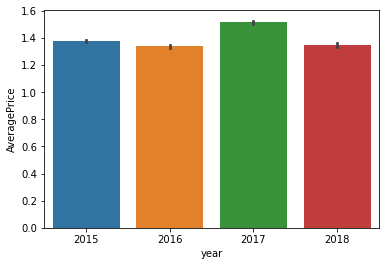

In [28]:
sns.barplot(x ='year',y='AveragePrice',data=df)

same we got as above that average price hike was in 2017 which was higher compare to rest of the years

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

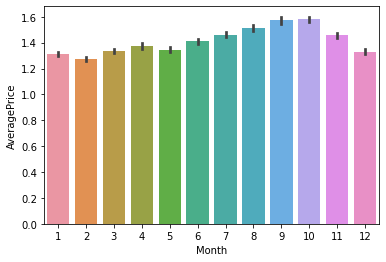

In [30]:
# Checking which month the average price was higher 
sns.barplot(x='Month',y ='AveragePrice',data=df)

As we can see from above visualization that price hike was mostly in the month of sept and oct rather than that almost
all the month the average price were almost same . That means demand for avacado is not so much in Those market we can say it's neutral

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

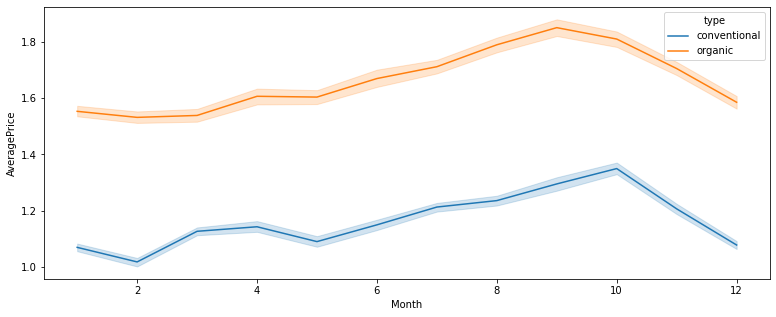

In [32]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'Month',y ='AveragePrice',hue ='type',data=df)


Overall both the types are showing increasing graph till october but from november downfall has been shown that means these two months we can consider that
consumer here are less interested in this product.

<AxesSubplot:xlabel='Month', ylabel='Total_Volume'>

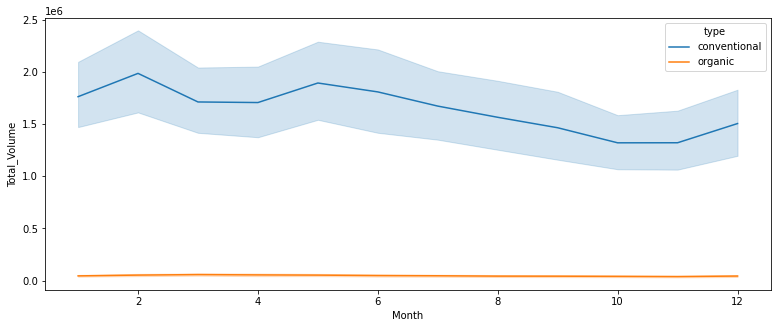

In [34]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'Month',y ='Total_Volume',hue ='type',data=df)

Organic is almost in straight line that means there is not much change in volume of organic type
but conventional is showing decrease in volume from June month.

# Feature Engineering

In [37]:
# Replace Label columns into binary codes
df['type'] = df['type'].replace({'conventional':1,'organic':0})

Using Label encoder to transform region data

In [38]:
le = LabelEncoder()

In [39]:
df1 = le.fit_transform(df['region'])
pd.Series(df1)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Length: 18249, dtype: int64

In [40]:
df['region']=df1

In [41]:
df.head()

,Date,AveragePrice,Total_Volume,plu_4046,plu_4225,plu_4770,Total_Bags,Small_Bags,Large_bags,XLarge_Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,0,11,29


# Checking skewness in data

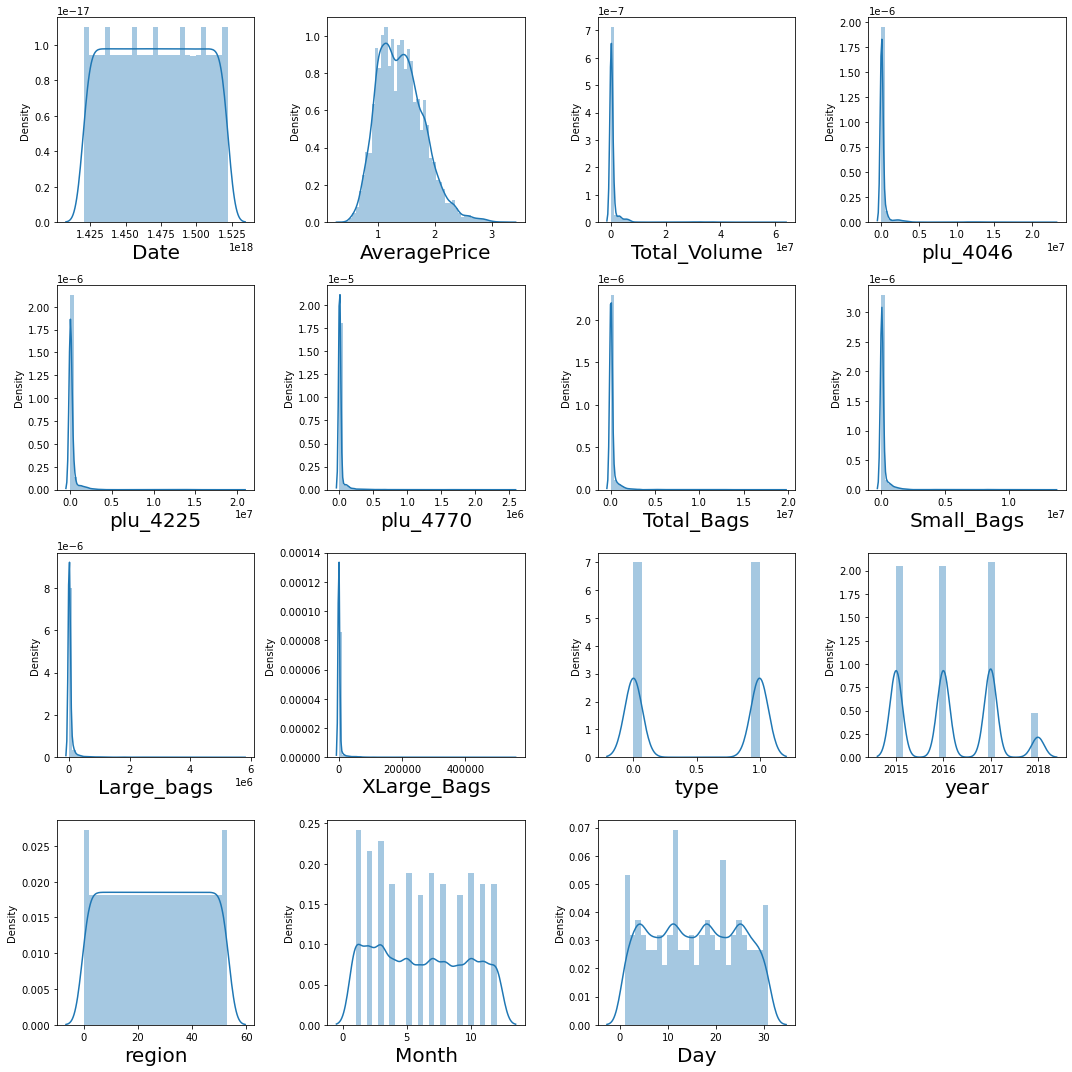

In [42]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

from above graph we can see that most of our data are left skewed . We need to fix the same excdept those which are categorical and target column as we can't treat skewness for those

In [43]:
df.skew()

AveragePrice     0.580303
Total_Volume     9.007687
plu_4046         8.648220
plu_4225         8.942466
plu_4770        10.159396
Total_Bags       9.756072
Small_Bags       9.540660
Large_bags       9.796455
XLarge_Bags     13.139751
type            -0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [44]:
skew= ['Total_Volume','plu_4046','plu_4225','plu_4770','Total_Bags','Small_Bags','Large_bags','XLarge_Bags']

In [45]:
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [46]:
df.skew()

AveragePrice    0.580303
Total_Volume    0.088098
plu_4046       -0.328195
plu_4225       -0.486654
plu_4770        0.099986
Total_Bags     -0.218874
Small_Bags     -0.622148
Large_bags     -0.547765
XLarge_Bags     1.176494
type           -0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

s we used log1p transformation method for skewness so almost all the value is near to 0 which is good for our model bulding as 
best skew value for normal distribution is near to 0

# Checking Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

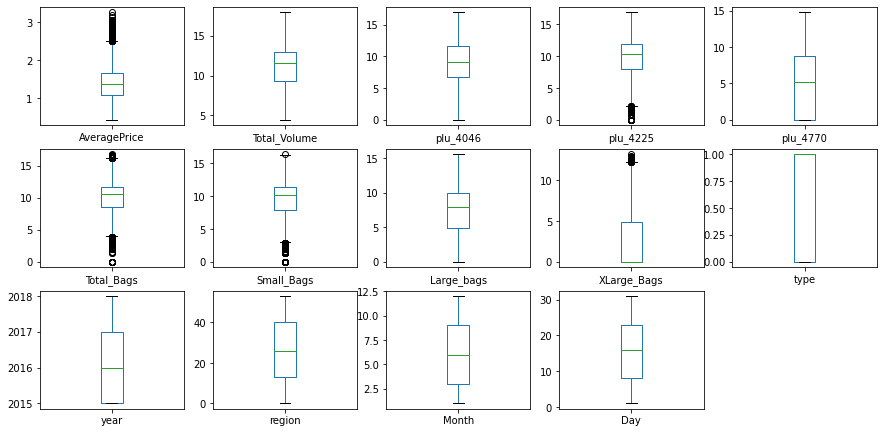

In [47]:
# Checking Outliers in data
df.plot(kind = 'box',subplots = True,layout = (4,5),figsize=(15,10))
plt.show

Outliers found in :
1. plu_4225
2. Total_bags
3. Small_Bags
3. XLarge_bags


In [48]:
from scipy.stats import zscore

In [49]:
dfContCols = df[["plu_4225","Total_Bags","Small_Bags","XLarge_Bags"]]

In [50]:
# applying zscore on only the dataset which has continuous columns
z=np.abs(zscore(dfContCols))
# be carefull with the code and variables used here
df_new=df[(z<3).all(axis=1)]

In [51]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (18249, 15)
shape after          : (17954, 15)
Percentage Loss      : 0.01616526932982629


<function matplotlib.pyplot.show(close=None, block=None)>

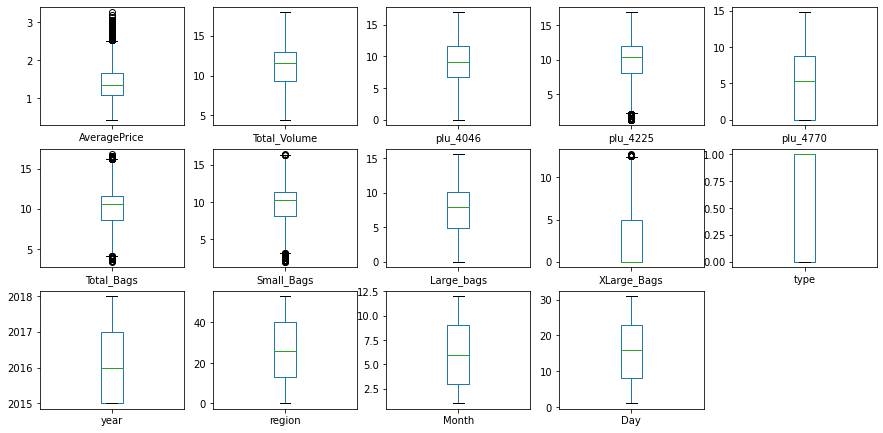

In [52]:
# Checking Outliers in data
df_new.plot(kind = 'box',subplots = True,layout = (4,5),figsize=(15,10))
plt.show

So our data loss is very less here and able to remove outliers from our dataset. And almost reduced the outlier present in data 

In [53]:
df_new.head()

,Date,AveragePrice,Total_Volume,plu_4046,plu_4225,plu_4770,Total_Bags,Small_Bags,Large_bags,XLarge_Bags,type,year,region,Month,Day
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,1,2015,0,12,27
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,1,2015,0,12,20
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,1,2015,0,12,13
3,2015-12-06,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,1,2015,0,12,6
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,1,2015,0,11,29


Already extracted data of month and year from date column so deleting the same for further process

In [54]:
df_new.drop(columns=['Date'],inplace=True)

# Checking the correlation among features if any using code and heatmap

In [55]:
df_new.corr()

,AveragePrice,Total_Volume,plu_4046,plu_4225,plu_4770,Total_Bags,Small_Bags,Large_bags,XLarge_Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.584100,-0.546760,-0.454531,-0.504912,-0.572755,-0.500544,-0.477093,-0.377046,-0.615045,0.107084,-0.018651,0.160944,0.027605
Total_Volume,-0.584100,1.000000,0.886223,0.914288,0.831913,0.947145,0.912401,0.670969,0.659565,0.794850,0.074384,0.120802,-0.032736,-0.009139
plu_4046,-0.546760,0.886223,1.000000,0.765076,0.745912,0.799939,0.780405,0.582813,0.583888,0.720372,0.002979,0.198574,-0.030566,-0.006221
plu_4225,-0.454531,0.914288,0.765076,1.000000,0.799255,0.811845,0.770377,0.616725,0.593822,0.741744,0.004418,0.080793,-0.028828,-0.008028
plu_4770,-0.504912,0.831913,0.745912,0.799255,1.000000,0.776515,0.770196,0.555793,0.639994,0.778984,-0.054857,0.079401,-0.024965,-0.001723
Total_Bags,-0.572755,0.947145,0.799939,0.811845,0.776515,1.000000,0.947345,0.712245,0.638923,0.726523,0.204343,0.126674,-0.021984,-0.006355
Small_Bags,-0.500544,0.912401,0.780405,0.770377,0.770196,0.947345,1.000000,0.550137,0.621062,0.725954,0.176754,0.110776,-0.018282,-0.003101
Large_bags,-0.477093,0.670969,0.582813,0.616725,0.555793,0.712245,0.550137,1.000000,0.467430,0.497250,0.186362,0.121455,-0.019263,-0.002186
XLarge_Bags,-0.377046,0.659565,0.583888,0.593822,0.639994,0.638923,0.621062,0.467430,1.000000,0.626093,0.161787,0.020457,0.001548,0.006440
type,-0.615045,0.794850,0.720372,0.741744,0.778984,0.726523,0.725954,0.497250,0.626093,1.000000,-0.013273,0.007730,0.000805,0.001113


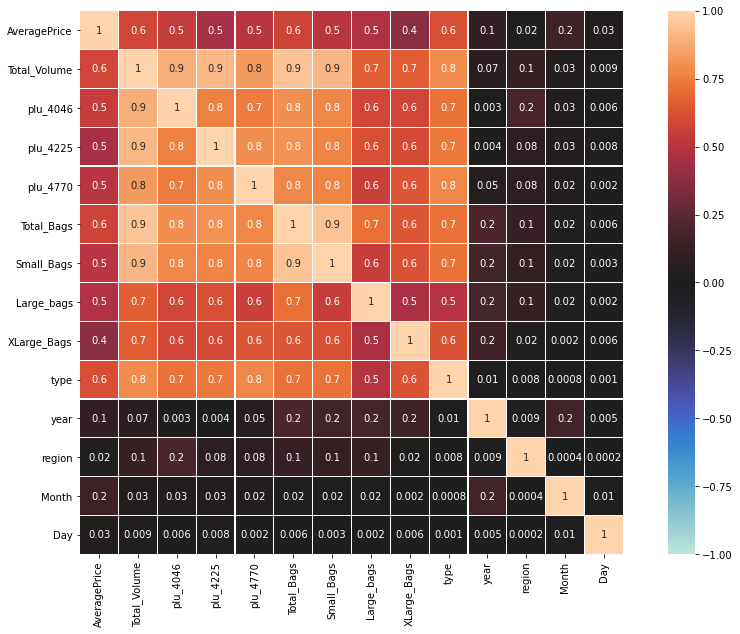

In [56]:
# Checking correlation with the help of heatmap
df_corr = df_new.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


Correlation between features seems to be fine as showing less correlation so no need to do anything for this.

# Preprocessing

In [58]:
# Splitting Target and feature variable into x and y
x = df_new.drop(columns = ['AveragePrice'])
y = df_new['AveragePrice']

Feature data is initiated by variable x and label by y

In [60]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[-0.12548861, -0.621533  ,  0.36285871, ..., -1.69337078,
         1.64539358,  1.292764  ],
       [-0.19456359, -0.74958934,  0.29165025, ..., -1.69337078,
         1.64539358,  0.49502264],
       [ 0.14206546, -0.70068384,  0.611968  , ..., -1.69337078,
         1.64539358, -0.30271872],
       ...,
       [-0.80110155, -0.57999961, -0.74764741, ...,  1.71065631,
        -1.46134332,  0.60898569],
       [-0.72957518, -0.50609726, -0.67779687, ...,  1.71065631,
        -1.46134332, -0.18875567],
       [-0.6961216 , -0.31569083, -0.76204536, ...,  1.71065631,
        -1.46134332, -0.98649703]])

# Finding Best Random State

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [64]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.7790795139078042 On Random state:  349


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=i)

In [69]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.5688680443742833


In [70]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

0.236087514253362


In [71]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(r2_score(y_test,pred))

0.7610686787581941


In [72]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

-0.39121188591962247


In [73]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.885572162103229


In [74]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

0.16583837884609812


### Checking whether my model is overfitting model or not using lasso and ridge

In [75]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [76]:
alpha = lassocv.alpha_
alpha

2.1924328645199242e-06

In [77]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.1924328645199242e-06)

In [78]:
lasso_reg.score(x_test,y_test)

0.5688679615970702

In [79]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [80]:
alpha = ridgecv.alpha_
alpha

0.1

In [81]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [82]:
ridge_reg.score(x_test,y_test)

0.5688688286722758

As there is not much difference in linearregression, lasso and ridge score so my model is not an overfitting model.

# Hyperparameter Tuning


As less difference between cv and r2 score is for linear regression so will do hyperparameter tuning for the same 

In [ ]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False

In [85]:
print(lr.get_params().keys())

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])


In [95]:
param = {'copy_X':[1,3,4,5,6],'fit_intercept':[True],'n_jobs':[-1],'normalize':[False]}

In [96]:
GC = GridSearchCV(lr,param,cv=5)

In [97]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [1, 3, 4, 5, 6], 'fit_intercept': [True],
                         'n_jobs': [-1], 'normalize': [False]})

In [98]:
GC.best_params_

{'copy_X': 1, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [102]:
final_lr = LinearRegression(copy_X=1, fit_intercept='True', n_jobs=-1, normalize='False')
final_lr.fit(x_train,y_train)
pred = final_lr.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

56.88680443742833


Almost same score as got in linear regression model.

# Save the model

In [103]:
import joblib
joblib.dump(final_lr,'FinalmodelAvacaddo.pk1')

['FinalmodelAvacaddo.pk1']